In [1]:
import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
with open("../outputs/untracked/00_01_01_node_id_to_first_publish_date.pickle", "rb") as f:
    node_id_to_first_publish_date = pickle.load(f)

In [8]:
with open("../outputs/untracked/00_01_01_node_id_to_node_name.json", "r") as f:
    node_id_to_node_name = json.load(f)

Reading the edgelist of the co-authorship network we built with script 00_01_01_create_network_of_authors.py

In [10]:
with open("../outputs/untracked/00_01_01_coauthorship_network.edgelist", "r") as f:
    G = nx.read_weighted_edgelist(f)

In [15]:
# %%
## First plot the degree distribution
def get_binned_distribution(values, number_of_bins = 20, log_binning = False, base = 10):
    lower_bound = min(values)
    upper_bound = max(values)
    
    if log_binning:
        lower_bound = np.log10(lower_bound)/ np.log10(base) if lower_bound > 0 else -1
        upper_bound = np.log10(upper_bound)/ np.log10(base)
        bins = np.logspace(lower_bound, upper_bound, number_of_bins, base=base)
    else:
        bins = np.linspace(lower_bound, upper_bound, number_of_bins)
    
    ## Calculating histogram
    y, _ = np.histogram(values, bins = bins, density = True)
    
    ## Now for each y we need to compute the value of x
    x = bins[1:] - np.diff(bins) / 2.
    
    # sanity check for probability density
    #print sum(map(lambda a,b : a*b, [bins[i] - bins[i-1] for i in xrange(1,len(bins))],y))
    
    return x,y

def plot(x,y, log = True, xsize = 8, ysize = 3, xlabel="", ylabel=""):
    plotted_figure = plt.figure(figsize = (xsize,ysize))
    if log:
        plt.loglog(x,y, '.')
    else:
        plt.plot(x,y, '.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return plotted_figure

First the number of nodes

In [16]:
N = G.number_of_nodes()
print(N)

44857


Number of edges

In [19]:
E = G.number_of_edges()
print(E)

2129967


Density

In [21]:
D = E/(N*(N-1)/2.)
print(D)

0.0021171523089728583


### Largest degree

In [27]:
print("Largest degree", max(dict(G.degree()).items()))

Largest degree ('9999', 44)


In [38]:
sorted(G.degree(),key = lambda x:x[1], reverse = True)[:30]

[('10603', 1929),
 ('15881', 1920),
 ('15668', 1908),
 ('33286', 1903),
 ('12907', 1902),
 ('29369', 1901),
 ('29199', 1889),
 ('4882', 1889),
 ('36772', 1888),
 ('41846', 1888),
 ('21914', 1887),
 ('33371', 1886),
 ('36884', 1886),
 ('33284', 1885),
 ('33071', 1883),
 ('33411', 1883),
 ('36971', 1883),
 ('398', 1883),
 ('27877', 1882),
 ('29139', 1882),
 ('19887', 1881),
 ('33405', 1881),
 ('15129', 1880),
 ('21854', 1879),
 ('197', 1878),
 ('1', 1877),
 ('102', 1877),
 ('104', 1877),
 ('10410', 1877),
 ('10413', 1877)]

In [34]:
node_id_to_node_name['31207']

'r calderon morales'

So this symposium was leading to all the nodes haveing such high degree of 1877. Here is the symposium:
https://ccforum.biomedcentral.com/articles/10.1186/s13054-016-1208-6?report=reader

We are removing this symposium for the ease of analysis later

Average degree

In [41]:
print("Average degree", sum(dict(G.degree()).values())/float(G.number_of_nodes()))

Average degree 94.96698397128654


Degree distribution

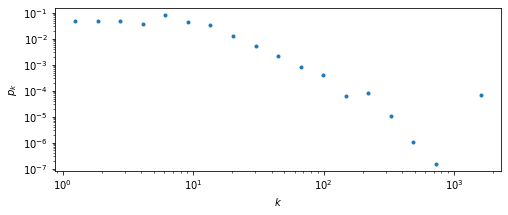

In [44]:
x,y = get_binned_distribution(list(dict(G.degree()).values()), log_binning=True)
_ = plot(x,y, xlabel=r"$k$", ylabel=r"$p_{k}$")

### Lets check if the network is connected or not

In [45]:
if nx.is_connected(G):
    print("The network is connected")
else:
    print("The network is not connected")

The network is not connected


### Portion of nodes in the connected giant components

In [50]:
print(sorted([len(x) for x in nx.connected_components(G)],reverse = True)[0] / G.number_of_nodes())

0.739394074503422


### We will actually do our later analyses on a network by removing the anomalous paper that creates at least 1877 degree to the participants